# A bacteria-specific machine learning study of individual antimicrobial peptide activity against E.coli


## Developers : Hamid Teimouri and Angela Medvedeva

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt
#%matplotlib inline
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg

#print(sklearn.__version__)
import import_ipynb
from amp_ml_functions import *
from scipy.stats import ks_2samp

from statsmodels.stats.weightstats import ztest as ztest

1.21.5
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
importing Jupyter notebook from amp_ml_functions.ipynb


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


1.21.5
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


## peptides targeting bacteria E.coli

In [2]:

df=pd.read_csv("Ecoli_AMP.csv", )

df

,peptide,sequence,MIC,MIC_0
0,2121,GGAGHVPEYFVGIGTPISFYG,0.03,1
1,2015,RRWCFRVCYRGFCYRKCR,0.13,1
2,759,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,0.50,1
3,2012,KWKSFLKTFKSAVKTVLHTALKAISS,0.50,1
4,2013,KWKSFLRTLKSPAKTVFHTALKAISS,0.50,1
...,...,...,...,...
392,4106,CLRIGMRGRELMGGIGKTM,300.00,0
393,17768,HLPLPLLQPLMQQVPQPI,3000.00,0
394,17769,LLNPTHQIYPVTQPLAPVHNPIS,3000.00,0
395,17773,YANPAVVRPHAQIPQR,3000.00,0


In [3]:
i=0
for elements in df['sequence']:
    if 'VV' in elements: 
        #if 'M' or 'W' or '' in elements: 
        i+=1
        #print(elements,i)
        
print(i)

88


### number of nonAMP peptides


In [4]:
df0=df[df['MIC_0']==0]
df0

,peptide,sequence,MIC,MIC_0
183,641,FLKALFKVALKVL,50.0,0
184,642,ALGALFKVASKVL,50.0,0
185,918,FLGALFKVASKVLPSVFCAITKKC,50.0,0
186,3087,GILDTLKQFAKGVGKDLVKGAAQGV,50.0,0
187,3088,GILDTLKQFAKGVGKDLVKGAAQG,50.0,0
...,...,...,...,...
392,4106,CLRIGMRGRELMGGIGKTM,300.0,0
393,17768,HLPLPLLQPLMQQVPQPI,3000.0,0
394,17769,LLNPTHQIYPVTQPLAPVHNPIS,3000.0,0
395,17773,YANPAVVRPHAQIPQR,3000.0,0


In [5]:
i=0
for elements in df0['sequence']:
    if 'VV' in elements: 
        #if 'M' or 'W' or '' in elements: 
        i+=1
        #print(elements,i)
        
print(i)

79


### number of AMP peptides

In [6]:
df[df['MIC_0']==1].shape

(183, 4)

### uploading propy features for all peptides

In [7]:
df=pd.read_csv("Ecoli_AMP_all_descriptors.csv")
df1=df.drop(columns=['Unnamed: 0','AMP_Name'])

df1

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,MIC,MIC_0
0,0,4.762,0.000,0.000,0.000,0.000,4.762,0.000,28.571,4.762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.03,1
1,7,0.000,33.333,0.000,0.000,22.222,0.000,0.000,5.556,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.13,1
2,3,13.333,13.333,0.000,0.000,20.000,3.333,3.333,10.000,0.000,...,0.013536,0.012193,0.008587,0.002535,0.003147,0.000079,0.000079,0.0,0.50,1
3,7,11.538,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.846,...,0.015054,0.008853,0.005220,0.000000,0.000000,0.000000,0.000000,0.0,0.50,1
4,7,11.538,3.846,0.000,0.000,0.000,0.000,0.000,0.000,3.846,...,0.014867,0.008743,0.005155,0.000000,0.000000,0.000000,0.000000,0.0,0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3,0.000,15.789,0.000,0.000,5.263,5.263,0.000,26.316,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,300.00,0
393,1,0.000,0.000,0.000,0.000,0.000,0.000,22.222,0.000,5.556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3000.00,0
394,2,4.348,0.000,8.696,0.000,0.000,0.000,8.696,0.000,8.696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3000.00,0
395,3,18.750,12.500,6.250,0.000,0.000,0.000,12.500,0.000,6.250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3000.00,0


## Feature Selection Method 1: Lasso Regression

In [8]:
df0 = df1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df0)
scaled_features_df = pd.DataFrame(df_normalized, index=df0.index, columns=df0.columns)
scaled_features_df

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,MIC,MIC_0
0,0.238095,0.148150,0.00000,0.000000,0.00000,0.000000,0.23810,0.000000,0.742837,0.154766,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,1.0
1,0.571429,0.000000,0.66666,0.000000,0.00000,0.611099,0.00000,0.000000,0.144454,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000033,1.0
2,0.380952,0.414803,0.26666,0.000000,0.00000,0.549995,0.16665,0.149986,0.259997,0.000000,...,0.399257,0.394124,0.324749,0.105757,0.11794,0.003379,0.003558,0.0,0.000157,1.0
3,0.571429,0.358958,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.124996,...,0.444032,0.286162,0.197413,0.000000,0.00000,0.000000,0.000000,0.0,0.000157,1.0
4,0.571429,0.358958,0.07692,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.124996,...,0.438516,0.282607,0.194955,0.000000,0.00000,0.000000,0.000000,0.0,0.000157,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.380952,0.000000,0.31578,0.000000,0.00000,0.144731,0.26315,0.000000,0.684208,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.099991,0.0
393,0.285714,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.180571,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.000000,0.0
394,0.333333,0.135271,0.00000,0.608708,0.00000,0.000000,0.00000,0.391324,0.000000,0.282622,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.000000,0.0
395,0.380952,0.583331,0.25000,0.437491,0.00000,0.000000,0.00000,0.562506,0.000000,0.203127,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.000000,0.0


In [9]:
X = np.array(scaled_features_df)
y = np.array(df1['MIC_0'])
klist = np.array(scaled_features_df.columns)

In [10]:
data_dict = {}
bacterium_file_name = "Ecoli_AMP_all_descriptors.csv"
bacterium_name = 'Ecoli'
data_dict = bacterium_load(bacterium_file_name,data_dict,bacterium_name)

In [11]:
data_dict

{'Ecoli': [     net_charge         A         R         N         D         C         E  \
  0     -0.260847  0.104228 -0.260847 -0.260847 -0.260847 -0.260847  0.104228   
  1      0.224072 -0.253449  2.020436 -0.253449 -0.253449  1.262474 -0.253449   
  2     -0.048889  0.695515  0.695515 -0.265013 -0.265013  1.175815 -0.024899   
  3      0.223752  0.514041 -0.224028 -0.224028 -0.224028 -0.224028 -0.224028   
  4      0.232888  0.531194  0.025560 -0.227257 -0.227257 -0.227257 -0.227257   
  ..          ...       ...       ...       ...       ...       ...       ...   
  392   -0.038514 -0.244575  0.839926 -0.244575 -0.244575  0.116925  0.116925   
  393   -0.153604 -0.227449 -0.227449 -0.227449 -0.227449 -0.227449 -0.227449   
  394   -0.096158  0.073908 -0.241018  0.388834 -0.241018 -0.241018 -0.241018   
  395   -0.024685  1.055229  0.626691  0.198154 -0.230383 -0.230383 -0.230383   
  396   -0.113628 -0.248590 -0.248590 -0.248590  0.313731 -0.248590  0.313731   
  
              Q 

In [12]:
XX=data_dict['Ecoli'][0]
yy=data_dict['Ecoli'][1]
klist = data_dict['Ecoli'][2]

In [13]:
X=np.array(XX)
y=np.array(yy)

In [14]:
#function for svm feature selection via bagging
#function for lasso feature selection
#function for cross validation

In [15]:
#for each bacterium:
#id the max accuracy for lasso & linear svm, and get the params and features
#all features, lasso features, svm features accuracy for each model

In [16]:
#AA = lasso_grid_search(X,y)
AA=0.01

In [17]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [18]:
def lasso_feature_selection1(Xtrain_cv,Ytrain_cv,CC,ns,klist):
    from sklearn.linear_model import Lasso
    import numpy as np
    listlocs = list(range(ns))
    results = list(range(ns))
    kfeatures = list(range(ns))
    kweights = list(range(ns))

    bagging_dict = {}
    model = Lasso(alpha = AA)
    for i in range(ns):
    
        X_train = Xtrain_cv[i]
        Y_train = Ytrain_cv[i]

        model.fit(X_train, Y_train)
        #print(i)
        #print(model.coef_)
        T = model.coef_
        #print(i)
        #print(T)
        TT = list(T)
        locs = np.where(abs(T) > 0)
        listlocs[i] = np.asarray(locs)

        if i == 0:
            flistlocs = listlocs[i]
            flistlocs=flistlocs[0]
        else:
            flistlocs = np.intersect1d(flistlocs,listlocs[i])
        

        for f in flistlocs:
            f_feature = klist[f]
            f_weight = T[f]
        
            if i == 0:
                bagging_dict[f_feature] = []
                bagging_dict[f_feature].append(f_weight)
            else:
                bagging_dict[f_feature].append(f_weight)

        kfeatures[i] = klist[listlocs[i]]
        kweights[i] = T[listlocs[i]]
        
    kfeatures=klist[flistlocs]
    featuredict={}
    for k,v in bagging_dict.items():
        if k in kfeatures:
            print(k, sum(v)/len(v))
            featuredict[k]=sum(v)/len(v)
    return featuredict

In [19]:
featuredict_lasso = lasso_feature_selection1(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

V -0.09769250262248806
_PolarizabilityD1075 0.061618890002533
_PolarizabilityD3100 -0.03623912321926175
_SolventAccessibilityD1025 -0.08183665800088351
_SolventAccessibilityD1050 -0.051099928414601085
_SecondaryStrD3001 -0.02574526937028227
_ChargeD1025 -0.027253057270348102
_PolarityD3025 -0.032768023172438224
_NormalizedVDWVD2025 0.05368834770564682
_NormalizedVDWVD3100 -0.013639712100954871
APAAC10 -0.05273876329925297
APAAC20 -0.044968719037394383
PAAC31 -0.03562902344005087
PAAC35 -0.012887614392315004


{'V': -0.09769250262248806,
 '_PolarizabilityD1075': 0.061618890002533,
 '_PolarizabilityD3100': -0.03623912321926175,
 '_SolventAccessibilityD1025': -0.08183665800088351,
 '_SolventAccessibilityD1050': -0.051099928414601085,
 '_SecondaryStrD3001': -0.02574526937028227,
 '_ChargeD1025': -0.027253057270348102,
 '_PolarityD3025': -0.032768023172438224,
 '_NormalizedVDWVD2025': 0.05368834770564682,
 '_NormalizedVDWVD3100': -0.013639712100954871,
 'APAAC10': -0.05273876329925297,
 'APAAC20': -0.044968719037394383,
 'PAAC31': -0.03562902344005087,
 'PAAC35': -0.012887614392315004}

In [20]:
def svm_feature_plot2(featuredict,fig_title,fonts):

    featuredict = sorted(featuredict.items(), key=lambda x:x[1])
    feature_name=[]
    feature_coef=[]

    for items in featuredict:
        #print(items[0], items[1])
        feature_name.append(items[0])
        feature_coef.append(items[1])
    xx=feature_name
    yy=feature_coef
    # Plot of feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()

    #plt.figure(figsize=(7, 7))
    dr=0.05
    plt.barh(xx, yy, color='g')
    #ax.set_xticks(np.arange(-max(yy),max(yy),0.1))
    #ax.set_xticks(np.arange(-np.round(max(yy),2),np.round(max(yy),2)+dr,dr))

    plt.grid(False)

    plt.xlabel("Feature Importance",  fontsize=fonts)
    plt.figtext(0.45,0.94,'(a)',size=25)
    plt.tick_params(labelsize=18)
    plt.savefig(fig_title, bbox_inches = 'tight',
        pad_inches = 0)
    plt.show()

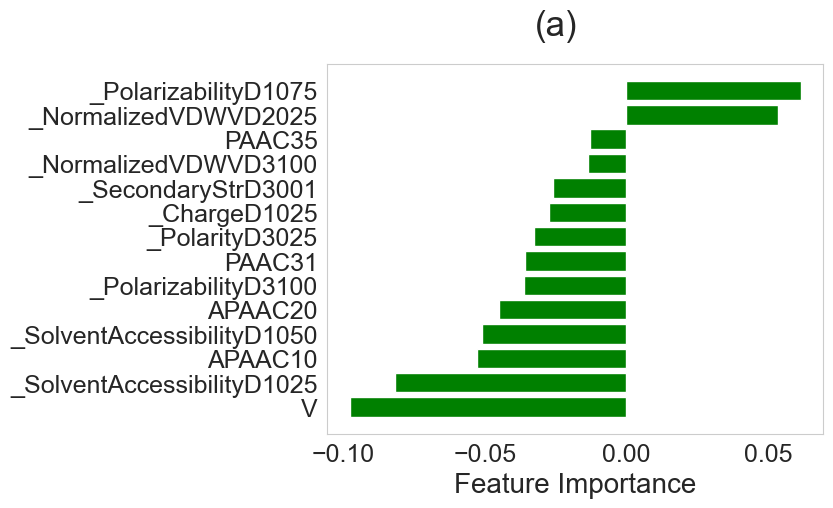

In [21]:
featuredict=featuredict_lasso
fonts=20
fig_title = "Ecoli_Feature_Importance_lasso.pdf"
svm_feature_plot2(featuredict,fig_title, fonts)

## Feature Selection Method 2: Support Vector Machine

In [22]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [23]:
CC = linear_SVM_grid_search(X,y,ns)
CC

/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/p

0.1

In [24]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

V -0.190596819772943
_PolarizabilityD1075 0.15095680183775861
_PolarizabilityD3100 -0.0630194675140286
_SolventAccessibilityD1025 -0.1804030240173938
_SolventAccessibilityD1050 -0.1383522661054741
_ChargeD1025 -0.04881114817178247
_NormalizedVDWVD2025 0.12961115350996966
_NormalizedVDWVD3100 -0.06698681235690247
APAAC20 -0.11891448765125924
PAAC31 -0.0915366769635079


{'V': -0.190596819772943,
 '_PolarizabilityD1075': 0.15095680183775861,
 '_PolarizabilityD3100': -0.0630194675140286,
 '_SolventAccessibilityD1025': -0.1804030240173938,
 '_SolventAccessibilityD1050': -0.1383522661054741,
 '_ChargeD1025': -0.04881114817178247,
 '_NormalizedVDWVD2025': 0.12961115350996966,
 '_NormalizedVDWVD3100': -0.06698681235690247,
 'APAAC20': -0.11891448765125924,
 'PAAC31': -0.0915366769635079}

In [25]:
def svm_feature_plot2(featuredict,fig_title,fonts):

    featuredict = sorted(featuredict.items(), key=lambda x:x[1])
    feature_name=[]
    feature_coef=[]

    for items in featuredict:
        #print(items[0], items[1])
        feature_name.append(items[0])
        feature_coef.append(items[1])
    xx=feature_name
    yy=feature_coef
    # Plot of feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()

    #plt.figure(figsize=(7, 7))
    dr=0.1
    plt.barh(xx, yy, color='orange')
    #ax.set_xticks(np.arange(-max(yy),max(yy),0.1))
    ax.set_xticks(np.arange(-np.round(max(yy),2),np.round(max(yy),2)+dr,dr))

    plt.grid(False)

    plt.xlabel("Feature Importance",  fontsize=fonts)
    plt.figtext(0.45,0.94,'(b)',size=25)
    plt.tick_params(labelsize=18)
    plt.savefig(fig_title, bbox_inches = 'tight',
        pad_inches = 0)
    plt.show()

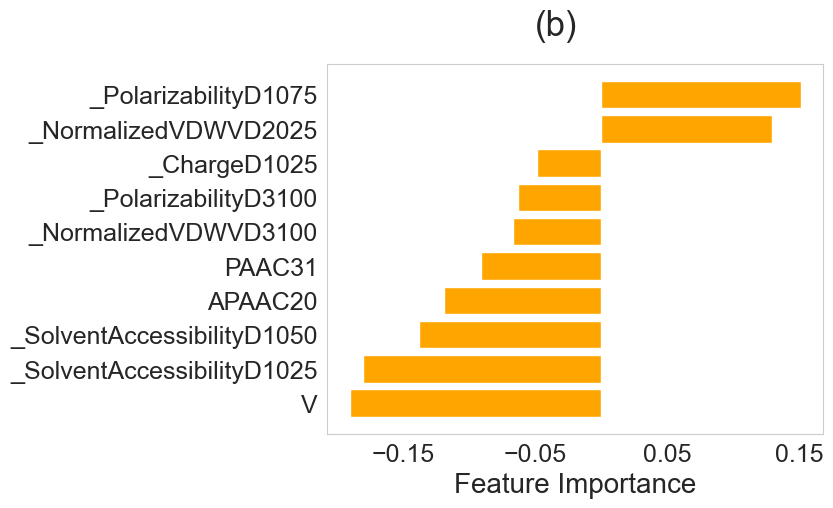

In [26]:
featuredict=featuredict_svm
fig_title = "Ecoli_Feature_Importance_SVM.pdf"
svm_feature_plot2(featuredict,fig_title,20)

In [27]:
svc_model,confusion,class_report,y_predict = svm_function(X,y)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        56
           1       0.60      0.88      0.71        24

    accuracy                           0.79        80
   macro avg       0.77      0.81      0.77        80
weighted avg       0.83      0.79      0.80        80



## Here we consider all 1500 features for the three ML models

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.21.5
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
1.0.2


In [29]:
log_array,svm_array = models_crossval(Xtrain_cv,Ytrain_cv,ns)


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

average logistic regression accuracy:0.9625657202944268
average SVM accuracy:0.7903259726603575
average logistic regression recall:0.9621311650511363
average SVM recall:0.7915671980560229
average logistic regression matthews_corrcoef:0.9247058349814291
average SVM matthews_corrcoef:0.5817448134246105


## Here we use features from SVM

In [30]:

cols=list(featuredict_svm.keys())
X=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(X, yy):
    Xtrain_cv[i] = X[train_index]
    Xtest_cv[i] = X[test_index]
    Ytrain_cv[i] = yy[train_index]
    Ytest_cv[i] = yy[test_index]
    i+=1
    #print(i)

In [31]:
log_array,svc_array = models_crossval(Xtrain_cv,Ytrain_cv,ns)

average logistic regression accuracy:0.7173501577287067
average SVM accuracy:0.7406940063091483
average logistic regression recall:0.7173168842959758
average SVM recall:0.7443616651980026
average logistic regression matthews_corrcoef:0.43360391862045106
average SVM matthews_corrcoef:0.4881421428612251


## Here we use features from Lasso method

In [32]:

cols=list(featuredict_lasso.keys())
X=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(X, yy):
    Xtrain_cv[i] = X[train_index]
    Xtest_cv[i] = X[test_index]
    Ytrain_cv[i] = yy[train_index]
    Ytest_cv[i] = yy[test_index]
    i+=1
    #print(i)

In [33]:
log_array,svc_array = models_crossval(Xtrain_cv,Ytrain_cv,ns)

average logistic regression accuracy:0.7297581493165091
average SVM accuracy:0.7512092534174554
average logistic regression recall:0.7294520547945207
average SVM recall:0.7541750113487677
average logistic regression matthews_corrcoef:0.45804397157937465
average SVM matthews_corrcoef:0.5073342629307195


## Bar plots for accuracy and recall

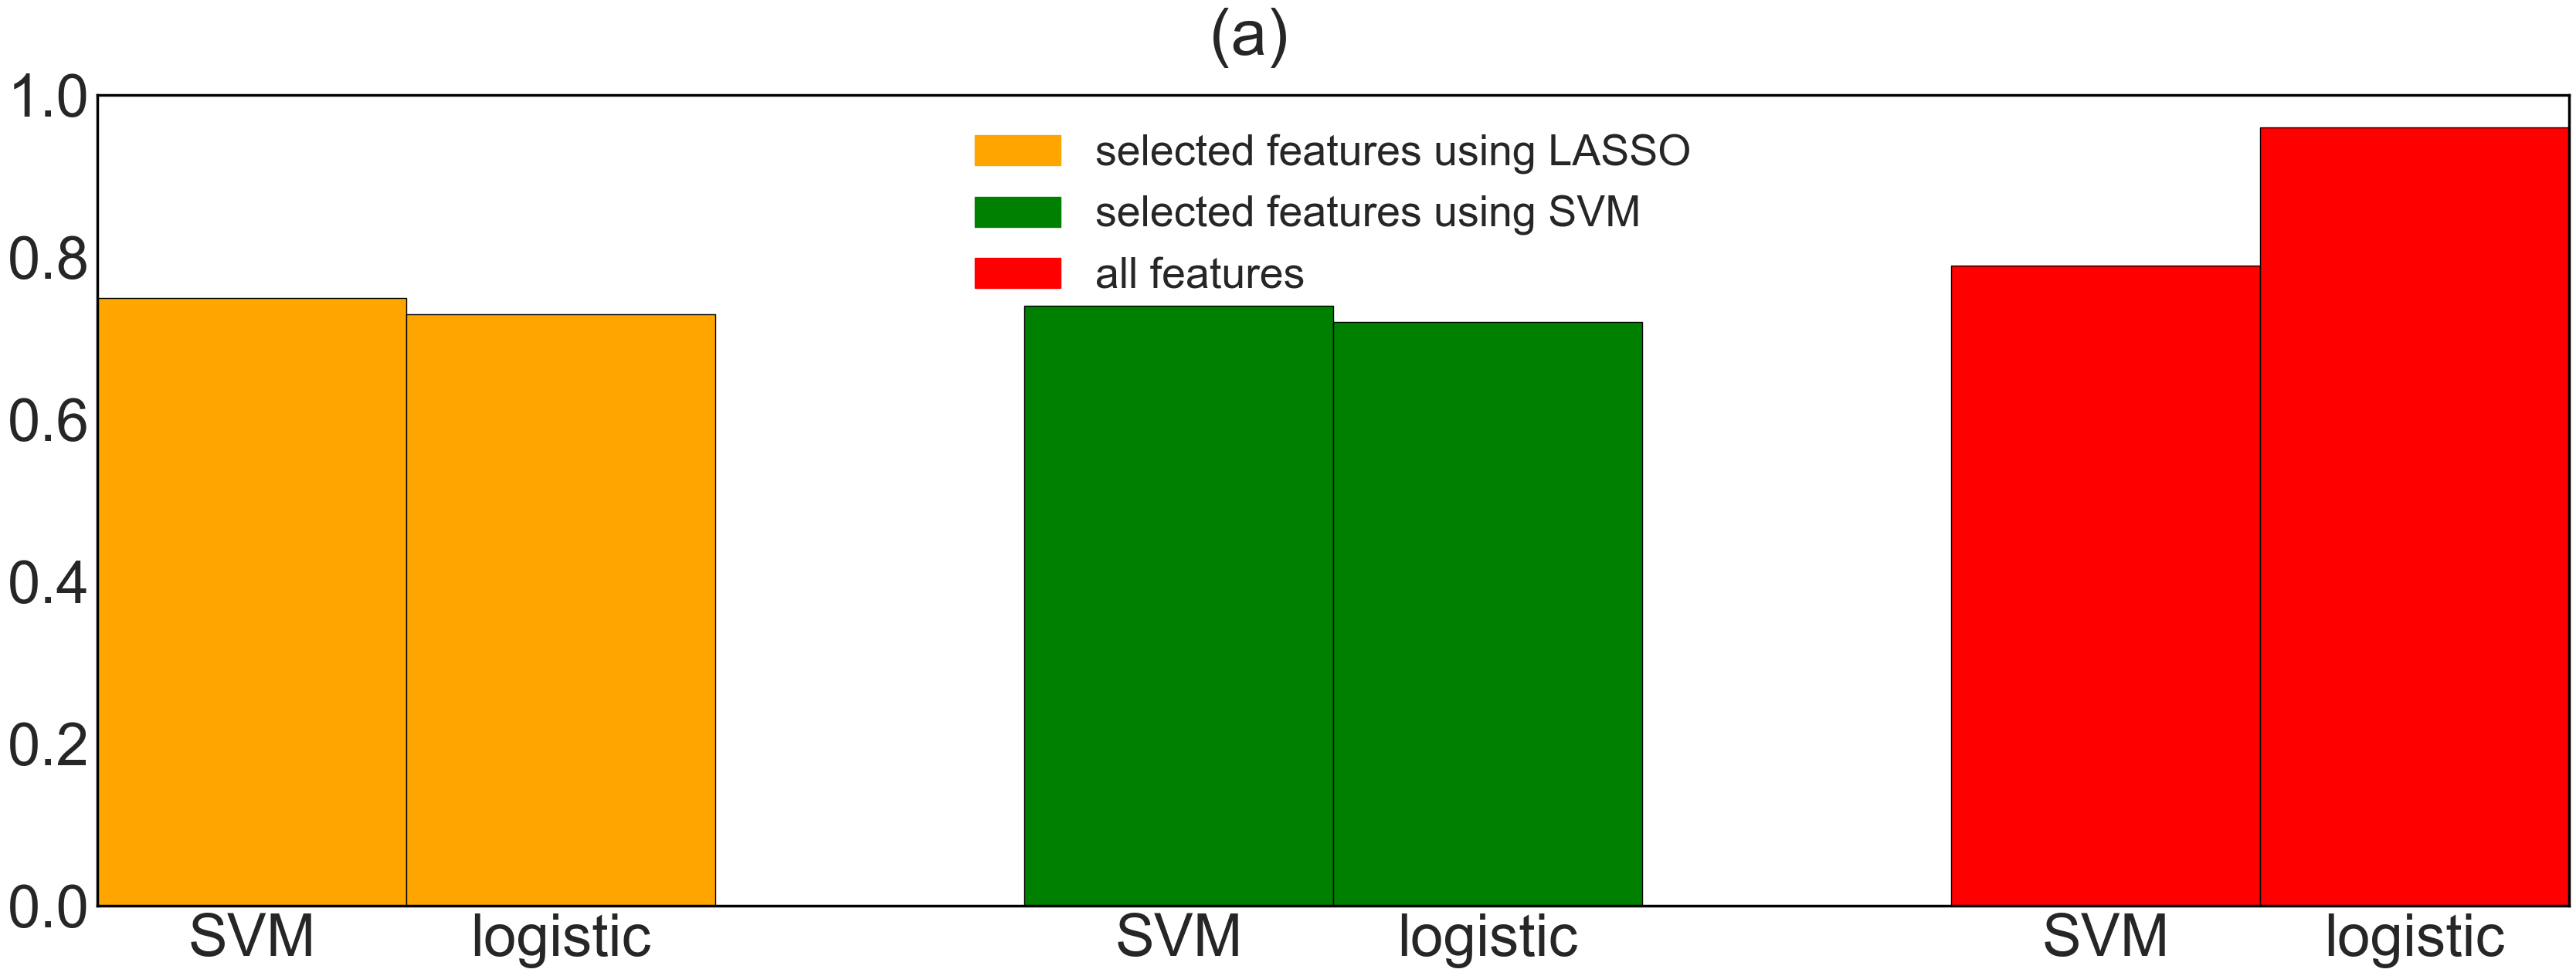

In [30]:

fig = plt.gcf()
fig.set_size_inches(32, 10.5)

#lasso: average logistic regression accuracy:0.7454258675078863
#average SVM accuracy:0.7268138801261829

#SVM
#average logistic regression accuracy:0.7189274447949526
#average SVM accuracy:0.731230283911672

#all
#[0]logistic regression accuracy: 0.9526813880126183
#[1]SVM accuracy: 0.7823343848580442

Ydata = [0.75,0.73]
Ydata2 = [0.74,0.72]
Ydata3 = [0.79,0.96]

#br1 = np.array([1,2])
#br2 = np.array([5,6])
#br3 = np.array([9,10])

br1 = np.array([0.5,1])
br2 = np.array([2,2.5])
br3 = np.array([3.5,4])

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

#barWidth = 1
barWidth = 0.5

plt.bar(br1, Ydata, width = barWidth, edgecolor = 'black', color = 'orange')
plt.yticks(fontsize=45)
plt.bar(br2, Ydata2, width = barWidth, edgecolor = 'black', color = 'green')
plt.bar(br3, Ydata3, width = barWidth, edgecolor = 'black', color = 'red')

#plt.xticks([1,2,5,6,9,10],
#        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 45)
plt.xticks([0.5,1,2,2.5,3.5,4],
        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 55)
plt.yticks(fontsize=55)

plt.ylim([0,1])
#abline(0,0.5)
plt.grid(False)

#plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.figtext(0.45,1.05,'(a)',size=60)

Blue0 = mpatches.Patch(color='orange', label='selected features using LASSO')
Green0 = mpatches.Patch(color='green', label='selected features using SVM')
Red0 = mpatches.Patch(color='red', label='all features')
plt.legend(handles=[Blue0,Green0,Red0], loc='upper center', frameon=False, fontsize = 40)

plt.savefig("Ecoli_bar_plot_accuracy.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

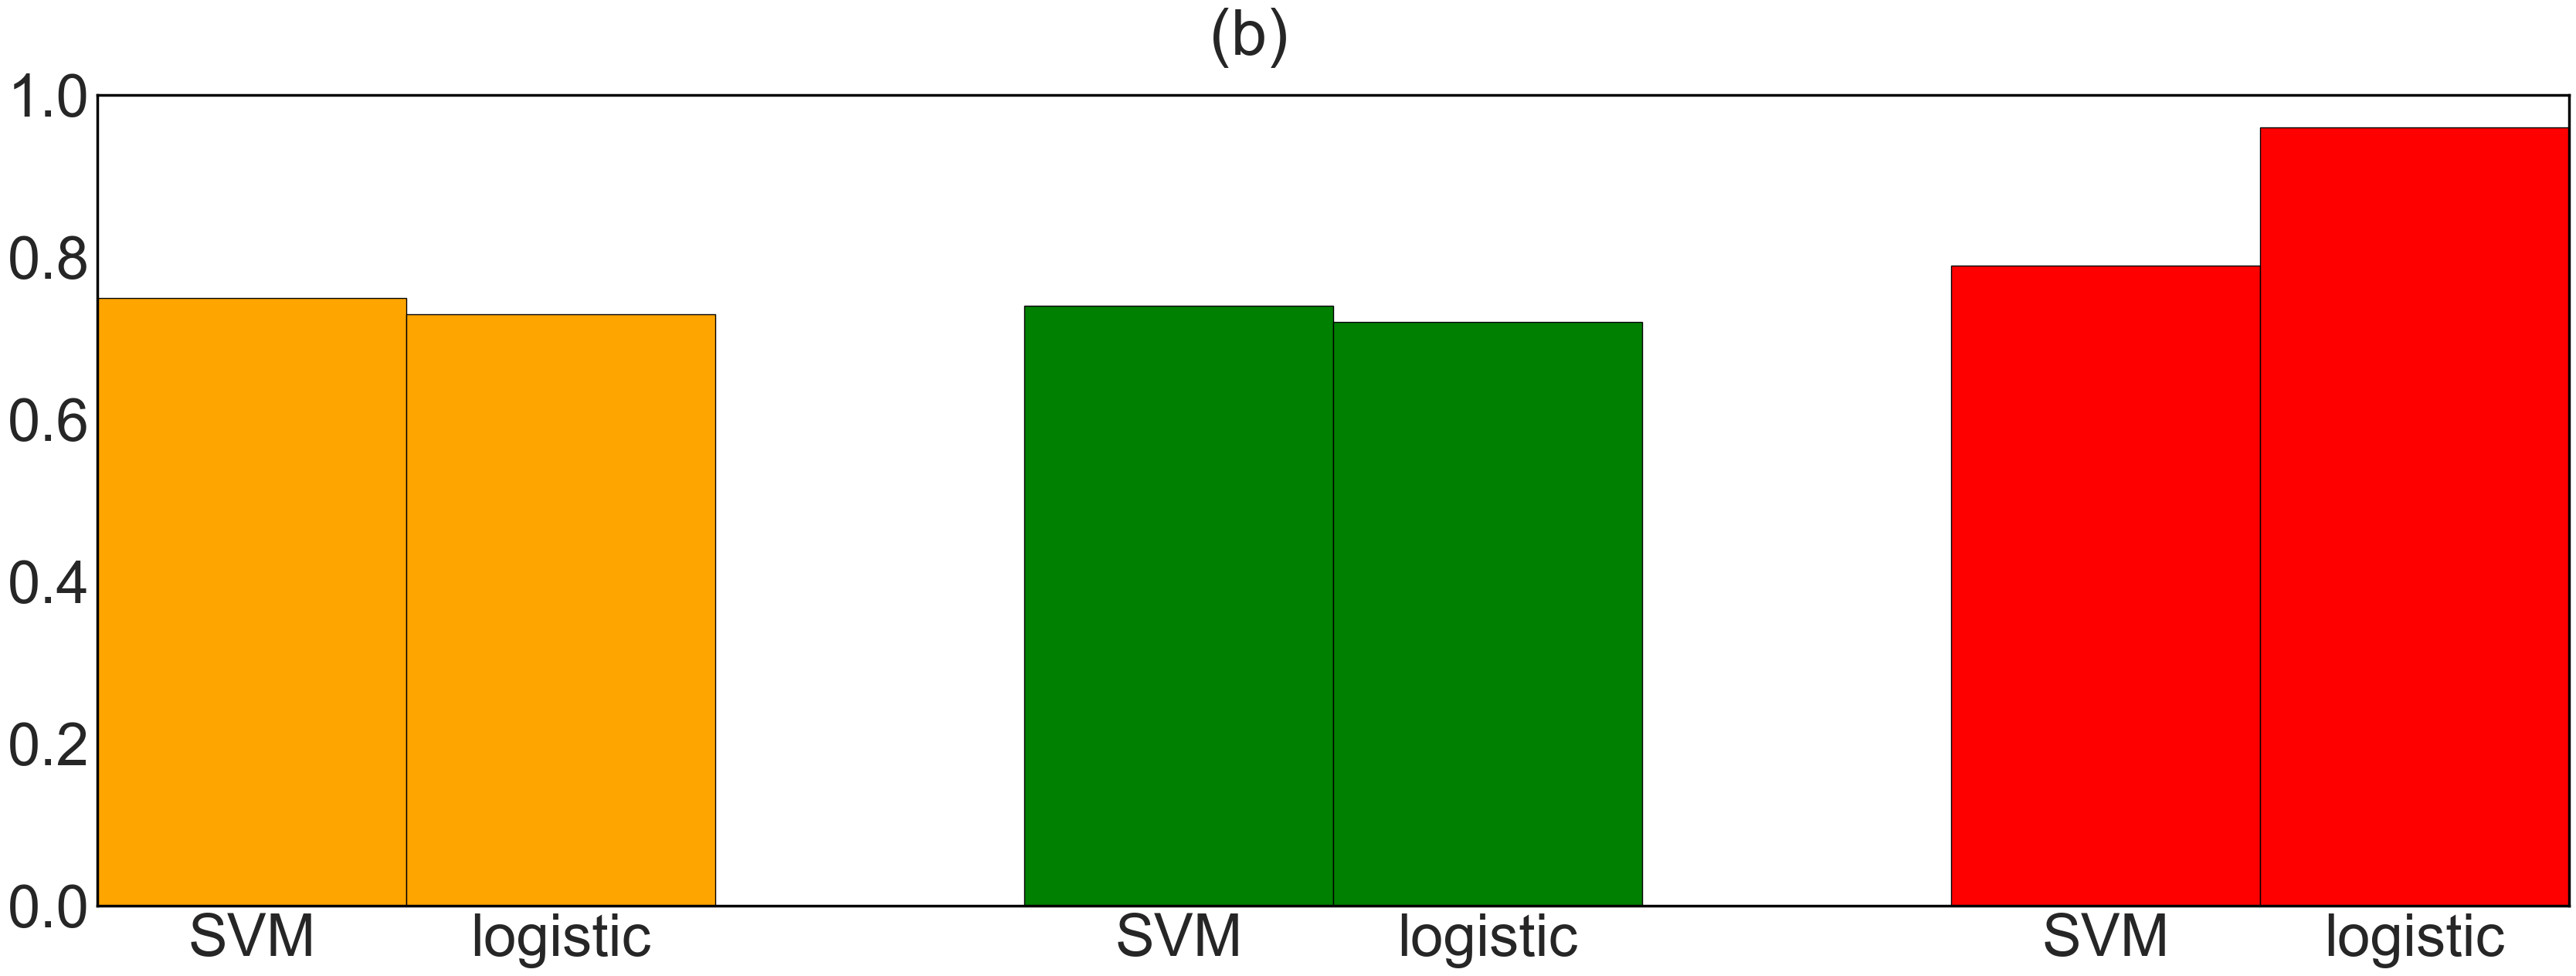

In [31]:

fig = plt.gcf()
fig.set_size_inches(32, 10.5)

#lasso: 
#average logistic regression recall:0.7294520547945207
#average SVM recall:0.7541750113487677

#SVM
#average logistic regression recall:0.7173168842959758
#average SVM recall:0.7443616651980026



Ydata = [0.75,0.73]
Ydata2 = [0.74,0.72]
Ydata3 = [0.79,0.96]

#br1 = np.array([1,2])
#br2 = np.array([5,6])
#br3 = np.array([9,10])

br1 = np.array([0.5,1])
br2 = np.array([2,2.5])
br3 = np.array([3.5,4])

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

#barWidth = 1
barWidth = 0.5

plt.bar(br1, Ydata, width = barWidth, edgecolor = 'black', color = 'orange')
plt.yticks(fontsize=45)
plt.bar(br2, Ydata2, width = barWidth, edgecolor = 'black', color = 'green')
plt.bar(br3, Ydata3, width = barWidth, edgecolor = 'black', color = 'red')

#plt.xticks([1,2,5,6,9,10],
#        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 45)
plt.xticks([0.5,1,2,2.5,3.5,4],
        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 55)
plt.yticks(fontsize=55)

plt.ylim([0,1])
#abline(0,0.5)
plt.grid(False)

#plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.figtext(0.45,1.05,'(b)',size=60)

Blue0 = mpatches.Patch(color='orange', label='selected features using LASSO')
Green0 = mpatches.Patch(color='green', label='selected features using SVM')
Red0 = mpatches.Patch(color='red', label='all features')
#plt.legend(handles=[Blue0,Green0,Red0], loc='upper center', frameon=False, fontsize = 40)

plt.savefig("Ecoli_bar_plot_recall.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

## lasso
## average logistic regression matthews_corrcoef:0.45804397157937465
## average SVM matthews_corrcoef:0.5073342629307195

## SVM
## average logistic regression matthews_corrcoef:0.43360391862045106
## average SVM matthews_corrcoef:0.4881421428612251

## all
## average logistic regression matthews_corrcoef:0.9247058349814291
## average SVM matthews_corrcoef:0.5817448134246105

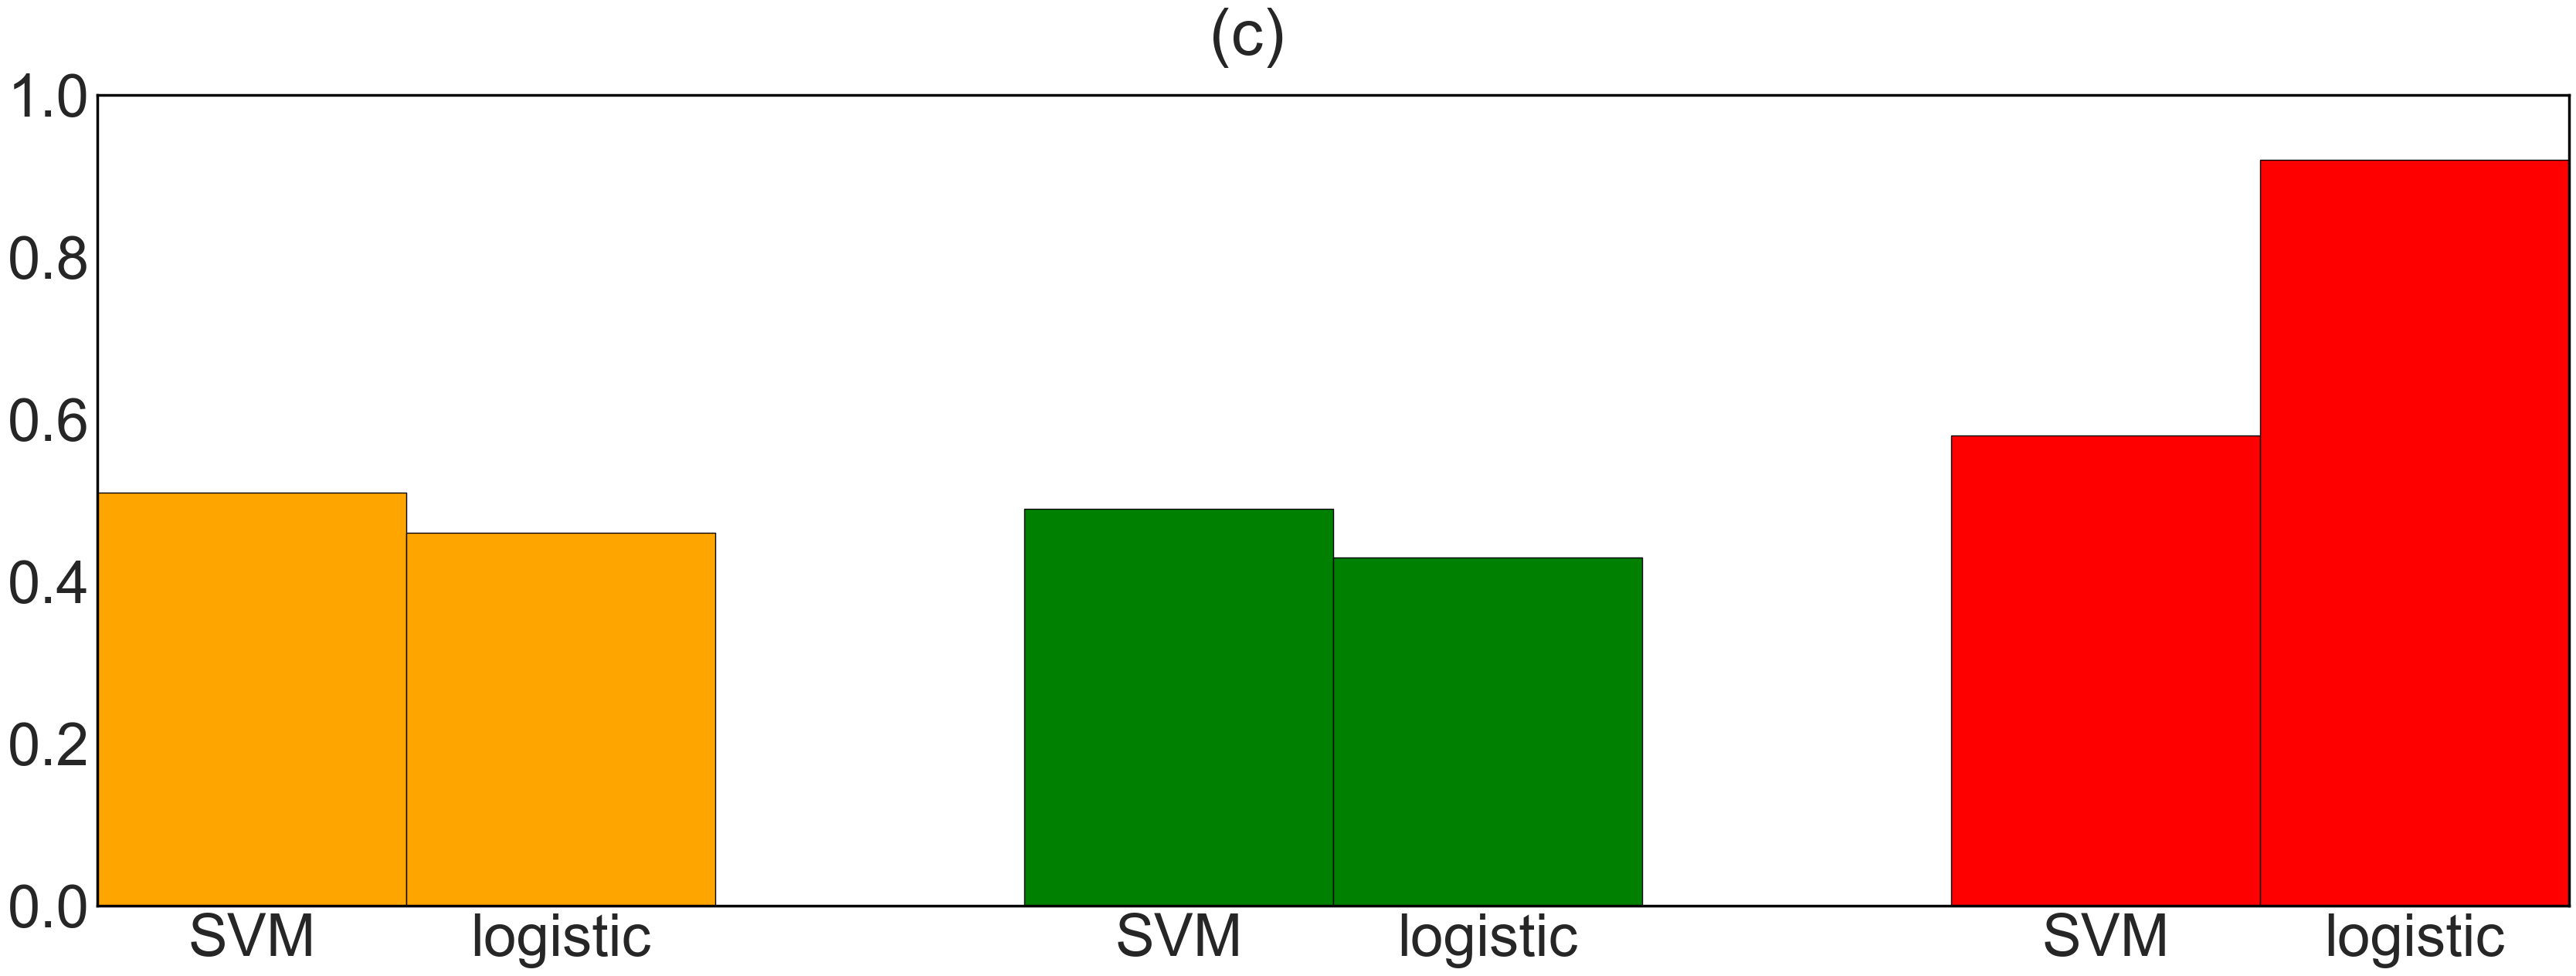

In [35]:

fig = plt.gcf()
fig.set_size_inches(32, 10.5)

Ydata = [0.51,0.46] # lasso
Ydata2 = [0.49,0.43] # svm
Ydata3 = [0.58,0.92] # all 

br1 = np.array([0.5,1])
br2 = np.array([2,2.5])
br3 = np.array([3.5,4])

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

#barWidth = 1
barWidth = 0.5

plt.bar(br1, Ydata, width = barWidth, edgecolor = 'black', color = 'orange')
plt.yticks(fontsize=45)
plt.bar(br2, Ydata2, width = barWidth, edgecolor = 'black', color = 'green')
plt.bar(br3, Ydata3, width = barWidth, edgecolor = 'black', color = 'red')

#plt.xticks([1,2,5,6,9,10],
#        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 45)
plt.xticks([0.5,1,2,2.5,3.5,4],
        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 55)
plt.yticks(fontsize=55)

plt.ylim([0,1])
#abline(0,0.5)
plt.grid(False)

#plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.figtext(0.45,1.05,'(c)',size=60)

Blue0 = mpatches.Patch(color='orange', label='selected features using LASSO')
Green0 = mpatches.Patch(color='green', label='selected features using SVM')
Red0 = mpatches.Patch(color='red', label='all features')
#plt.legend(handles=[Blue0,Green0,Red0], loc='upper center', frameon=False, fontsize = 40)

plt.savefig("Ecoli_bar_plot_mcc.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()